# bonus part1

**Use-Case Scenario: Property Assessment Prediction and Analysis for Buffalo**

The Current Assessment Roll (2024-2025) dataset provides detailed property assessments for Buffalo, including property values, land size, building features, and more. Using this dataset, we can develop a Property Classification and Value Prediction Model to analyze and predict property classes based on various property attributes.

How This Benefits Buffalo’s Residents, Businesses, and the City
1. Fair and Transparent Property Assessments
The model helps identify outliers and inconsistencies in property assessments.
Property owners can verify if their assessments are fair compared to similar properties.
2. Improved Taxation and Revenue Planning
The city can use the model to detect anomalies in property taxation, ensuring correct tax values.
Enables better forecasting of tax revenue for city planning and budgeting.
3. Real Estate and Business Investment Insights
Real estate investors can analyze property trends to make informed buying/selling decisions.
Businesses can identify high-value and low-value property zones, aiding in better investment decisions.
4. Urban Planning and Zoning Decisions
Helps policymakers classify properties into residential, commercial, or industrial zones more efficiently.
Assists in predicting future property trends to guide development projects.
5. Housing and Community Development
Identifies underdeveloped or undervalued areas for community development projects.
Assists in evaluating the impact of public infrastructure projects on property values.
Conclusion
This model enables Buffalo’s residents, businesses, and the local government to gain data-driven insights into property values, taxation fairness, and real estate trends. By leveraging AI and machine learning, the city can enhance urban planning, taxation policies, and business investments, ultimately leading to a more efficient and transparent property assessment system.

In [12]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns

url = 'https://data.buffalony.gov/api/views/4t8s-9yih/rows.csv?accessType=DOWNLOAD'
data = pd.read_csv(url)

print(data.head())

print(data.info())

print(data.isnull().sum())

                SBL      Print Key            Address  Front  Depth  \
0  0904100008037000     90.41-8-37          18 MARTHA   40.0   79.0   
1  1221400003005000     122.14-3-5  157 BUFFALO RIVER  240.0  208.0   
2  0778000002003000      77.80-2-3       2208 NIAGARA   65.0   12.0   
3  1005000007020000    100.50-7-20          73 LANDON   33.0  112.0   
4  1004200003053100  100.42-3-53.1         91 WINSLOW   59.5  114.0   

   Tax District  Property Class Code  \
0        147010                331.0   
1        147001                340.0   
2        147008                330.0   
3        147005                311.0   
4        147005                312.0   

                     Prop Class Description  Previous Property Class  \
0                             COM VAC W/IMP                    331.0   
1                    INDUSTRIAL VACANT LAND                    340.0   
2                    COMMERCIAL VACANT LAND                    330.0   
3                   RESIDENTIAL VACANT LAND 

In [16]:
selected_columns = ['Front', 'Depth', 'Tax District', 'Property Class Code', 'Total Value', 'Land Value',
                    'Number of Units', 'Acres', 'Total Living Area', '# of Beds', '# of Baths', '# of Kitchens']
data = data[selected_columns]

data.dropna(inplace=True)

scaler = StandardScaler()
data[selected_columns] = scaler.fit_transform(data[selected_columns])

label_encoder = LabelEncoder()
data['Property Class Code'] = label_encoder.fit_transform(data['Property Class Code'])

X = data.drop(columns=['Property Class Code'])
y = data['Property Class Code']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

<ipython-input-13-f33394159ab5>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
<ipython-input-13-f33394159ab5>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[selected_columns] = scaler.fit_transform(data[selected_columns])
<ipython-input-13-f33394159ab5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Epoch 5/100, Train Loss: 0.6113, Val Loss: 0.6737
Epoch 10/100, Train Loss: 0.5336, Val Loss: 0.6265
Epoch 15/100, Train Loss: 0.4881, Val Loss: 0.9499
Epoch 20/100, Train Loss: 0.4619, Val Loss: 0.6257
Epoch 25/100, Train Loss: 0.4460, Val Loss: 1.3558
Epoch 30/100, Train Loss: 0.4348, Val Loss: 0.6159
Epoch 35/100, Train Loss: 0.4259, Val Loss: 0.8108
Epoch 40/100, Train Loss: 0.4215, Val Loss: 1.0312
Epoch 45/100, Train Loss: 0.4141, Val Loss: 0.5491
Epoch 50/100, Train Loss: 0.4105, Val Loss: 1.0079
Epoch 55/100, Train Loss: 0.4073, Val Loss: 1.2396
Epoch 60/100, Train Loss: 0.4044, Val Loss: 1.0244
Epoch 65/100, Train Loss: 0.3990, Val Loss: 1.0784
Epoch 70/100, Train Loss: 0.3956, Val Loss: 1.3705
Epoch 75/100, Train Loss: 0.3943, Val Loss: 1.1336
Epoch 80/100, Train Loss: 0.3926, Val Loss: 1.5275
Epoch 85/100, Train Loss: 0.3902, Val Loss: 1.4351
Epoch 90/100, Train Loss: 0.3884, Val Loss: 0.7989
Epoch 95/100, Train Loss: 0.3859, Val Loss: 1.1068
Epoch 100/100, Train Loss: 0.384

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


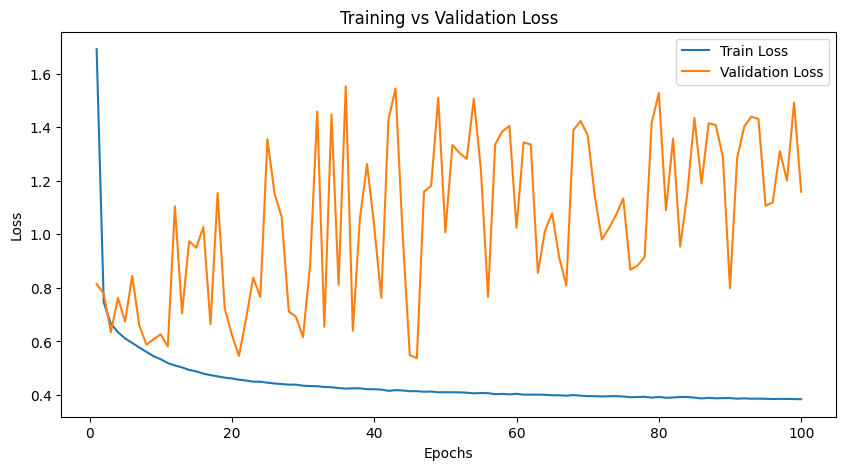

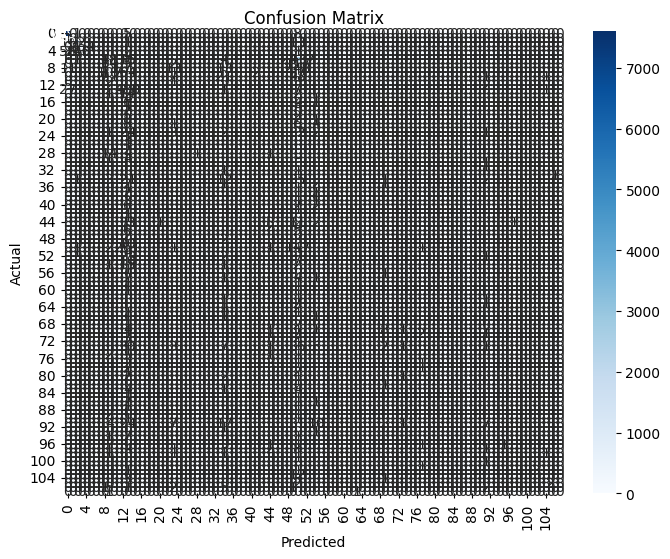

In [13]:
class PropertyNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(PropertyNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.fc4 = nn.Linear(128, output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.relu(self.bn3(self.fc3(x)))
        x = self.fc4(x)
        return x

input_size = X_train.shape[1]
output_size = len(label_encoder.classes_)
model = PropertyNN(input_size, output_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0002, weight_decay=1e-4)

epochs = 100
train_losses, val_losses = [], []
start_time = time.time()

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
    val_losses.append(val_loss / len(test_loader))

    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

print(f"Training completed in {time.time() - start_time:.2f} seconds")

model.eval()
y_pred, y_true = [], []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())
        y_true.extend(y_batch.numpy())

accuracy = accuracy_score(y_true, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred)

print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

plt.figure(figsize=(10,5))
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# To generate image to test deployment - Bonus part2

In [ ]:
import medmnist
from medmnist import OCTMNIST
from PIL import Image
import numpy as np

dataset = OCTMNIST(split='test', download=True)

img, label = dataset[0]

if not isinstance(img, Image.Image):
    img = Image.fromarray(np.array(img))

print("Sample image shape:", np.array(img).shape)
print("Label:", label)

img.save("sample_octmnist.png")
print("Sample OCTMNIST image saved as 'sample_octmnist.png'")

Using downloaded and verified file: /root/.medmnist/octmnist.npz
Sample image shape: (28, 28)
Label: [3]
Sample OCTMNIST image saved as 'sample_octmnist.png'
